In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

ModuleNotFoundError: No module named 'pandas'

In [ ]:
file_path = 'clean_data.csv'

df = pd.read_csv(file_path)


In [ ]:
print(df.head())

print("\nSize of the DataFrame:", df.shape)

             id       screen_name                   location  \
0  8.160000e+17  "HoustonPokeMap"              "Houston, TX"   
1  4.843621e+09         kernyeahx  Templeville town, MD, USA   
2  4.303727e+09   mattlieberisbot                        NaN   
3  3.063139e+09         sc_papers                        NaN   
4  2.955142e+09      lucarivera16      Dublin, United States   

                                         description  \
0  "Rare and strong PokŽmon in Houston, TX. See m...   
1  From late 2014 Socium Marketplace will make sh...   
2  Inspired by the smart, funny folks at @replyal...   
3                                                NaN   
4             Inspiring cooks everywhere since 1956.   

                         url  followers_count  friends_count  listed_count  \
0  "https://t.co/dnWuDbFRkt"             1291              0            10   
1                        NaN                1            349             0   
2    https://t.co/P1e1o0m4KC             108

In [ ]:
threshold = 0.35 * len(df)

df = df.dropna(thresh=threshold, axis=1)

print("\nDataFrame after dropping columns with more than 35% missing values:")

print(df.head())


DataFrame after dropping columns with more than 35% missing values:
             id       screen_name                   location  \
0  8.160000e+17  "HoustonPokeMap"              "Houston, TX"   
1  4.843621e+09         kernyeahx  Templeville town, MD, USA   
2  4.303727e+09   mattlieberisbot                        NaN   
3  3.063139e+09         sc_papers                        NaN   
4  2.955142e+09      lucarivera16      Dublin, United States   

                                         description  \
0  "Rare and strong PokŽmon in Houston, TX. See m...   
1  From late 2014 Socium Marketplace will make sh...   
2  Inspired by the smart, funny folks at @replyal...   
3                                                NaN   
4             Inspiring cooks everywhere since 1956.   

                         url  followers_count  friends_count  listed_count  \
0  "https://t.co/dnWuDbFRkt"             1291              0            10   
1                        NaN                1        

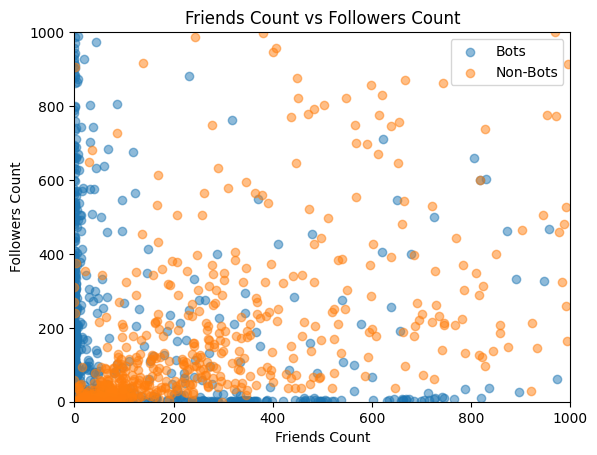

In [ ]:
bots = df[df['bot'] == 1]

non_bots = df[df['bot'] == 0]

plt.scatter(bots['friends_count'], bots['followers_count'], label='Bots', alpha=0.5)

plt.scatter(non_bots['friends_count'], non_bots['followers_count'], label='Non-Bots', alpha=0.5)

plt.xlabel('Friends Count')

plt.ylabel('Followers Count')

plt.title('Friends Count vs Followers Count')

plt.legend()

plt.xlim(0, 1000)  

plt.ylim(0, 1000)  

plt.show()

In [ ]:
def contains_bag_of_words(text, bag_of_words):
    
    if pd.isnull(text):
        return False
    
    text = text.lower()  
    
    return any(word in text for word in bag_of_words)

bag_of_words = ['bot', 'follow me', 'free', 'fake', 'virus', 'troll', 'clone', 'tweet me']

df['screen_name_binary'] = df['screen_name'].apply(lambda x: contains_bag_of_words(x, bag_of_words))

df['name_binary'] = df['name'].apply(lambda x: contains_bag_of_words(x, bag_of_words))

df['description_binary'] = df['description'].apply(lambda x: contains_bag_of_words(x, bag_of_words))

df['status_binary'] = df['status'].apply(lambda x: contains_bag_of_words(x, bag_of_words))

print(df[['screen_name', 'screen_name_binary', 'name', 'name_binary', 'description', 'description_binary', 'status', 'status_binary']].head())


        screen_name  screen_name_binary                  name  name_binary  \
0  "HoustonPokeMap"               False  "Houston PokŽ Alert"        False   
1         kernyeahx               False           Keri Nelson        False   
2   mattlieberisbot                True    Matt Lieber Is Bot         True   
3         sc_papers               False    single cell papers        False   
4      lucarivera16               False          lucarivera16        False   

                                         description  description_binary  \
0  "Rare and strong PokŽmon in Houston, TX. See m...               False   
1  From late 2014 Socium Marketplace will make sh...               False   
2  Inspired by the smart, funny folks at @replyal...                True   
3                                                NaN               False   
4             Inspiring cooks everywhere since 1956.               False   

                                              status  status_binary  
0  {

In [ ]:
from sklearn.tree import DecisionTreeClassifier

feature_cols = ['friends_count', 'followers_count', 'screen_name_binary', 'name_binary', 
            'status_binary', 'verified', 'statuses_count']

X = df[feature_cols]

y = df.bot 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy')

clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9524064171122995
Testing Accuracy: 0.9526184538653366
